In [2]:
# L1

# Импортируем библиотеку psutil для работы с системной информацией
import psutil

# Получаем информацию о состоянии всех сетевых интерфейсов (адаптеров)
interfaces = psutil.net_if_stats()

# Проходим по всем интерфейсам и выводим информацию
for interface, stats in interfaces.items():
    # Выводим имя интерфейса (адаптера)
    print(f"Интерфейс: {interface}")

    # Проверяем, активен ли интерфейс
    print(f"  Активен: {stats.isup}")

    # Выводим скорость интерфейса в Мбит/с
    print(f"  Скорость: {stats.speed} Мбит/с")

    # Определяем дуплексный режим
    if stats.duplex == 2:
        duplex_mode = 'Полный'  # Полный дуплекс
    elif stats.duplex == 1:
        duplex_mode = 'Полудуплексный'  # Полудуплексный режим
    else:
        duplex_mode = 'Неизвестно'  # Неизвестный режим

    # Выводим дуплексный режим
    print(f"  Дуплексный режим: {duplex_mode}")

    # Выводим максимальный размер пакета (MTU)
    print(f"  MTU: {stats.mtu}\n")  # Отображаем MTU и добавляем пустую строку для разделения

Интерфейс: lo
  Активен: True
  Скорость: 0 Мбит/с
  Дуплексный режим: Неизвестно
  MTU: 65536

Интерфейс: eno1
  Активен: False
  Скорость: 0 Мбит/с
  Дуплексный режим: Неизвестно
  MTU: 1500

Интерфейс: wlo1
  Активен: True
  Скорость: 0 Мбит/с
  Дуплексный режим: Неизвестно
  MTU: 1500

Интерфейс: nekoray-tun
  Активен: True
  Скорость: 10000 Мбит/с
  Дуплексный режим: Полный
  MTU: 9000



In [ ]:
# L2

from scapy.all import sniff, Ether

# Функция для обработки перехваченных кадров
def frame_handler(frame):
    # Проверяем наличие Ethernet слоя
    if frame.haslayer(Ether):
        eth_layer = frame[Ether]

        # Извлекаем поля Ethernet-фрейма
        src_mac = eth_layer.src
        dst_mac = eth_layer.dst
        eth_type = eth_layer.type
        payload = eth_layer.payload
        crc = b'\x00\x00\x00\x00'  # Пример контрольной суммы

        # Форматируем вывод Ethernet фрейма в виде таблицы
        print("\n=== Ethernet Frame ===")
        print("-" * 40)
        print(f"| {'MAC-адрес источника:':<30} | {src_mac} (6 байт) |")
        print(f"| {'MAC-адрес назначения:':<30} | {dst_mac} (6 байт) |")
        print(f"| {'Тип протокола:':<30} | {eth_type} (0x{eth_type:X}) (2 байта) |")
        print(f"| {'Поле данных:':<30} | {bytes(payload)} ({len(payload)} байт) |")
        print(f"| {'Контрольная сумма (CRC):':<30} | {crc} (4 байта) |")
        print(f"| {'Размер Ethernet заголовка:':<30} | {len(eth_layer)} байт |")
        print("-" * 40)

# Начинаем перехват кадров
print("Начинаем перехват кадров...\n")
sniff(prn=frame_handler, count=2)  # Перехватываем 2 кадра


In [ ]:
# 3. Сетевой

from scapy.all import sniff, IP, IPv6, ICMP

# Функция для обработки перехваченных пакетов
def packet_handler(packet):
    # Проверяем наличие IP-слоя
    if packet.haslayer(IP):
        ip_layer = packet[IP]
        print("\n=== IPv4 Packet ===")
        print("-" * 40)
        print(f"| {'Версия:':<30} | {ip_layer.version} (IPv4) |")  # 4 бита
        print(f"| {'Длина заголовка:':<30} | {ip_layer.ihl * 4} байт |")  # 4 бита
        print(f"| {'Тип обслуживания:':<30} | {ip_layer.tos} |")  # 8 бит
        print(f"| {'Длина пакета:':<30} | {len(packet)} байт |")  # 16 бит
        print(f"| {'Идентификация:':<30} | {ip_layer.id} |")  # 16 бит
        print(f"| {'Флаги:':<30} | {ip_layer.flags} |")  # 3 бита
        print(f"| {'Смещение фрагмента:':<30} | {ip_layer.frag} |")  # 13 бит
        print(f"| {'TTL:':<30} | {ip_layer.ttl} |")  # 8 бит
        print(f"| {'Протокол:':<30} | {ip_layer.proto} (0x{ip_layer.proto:X}) |")  # 8 бит
        print(f"| {'Контрольная сумма:':<30} | {ip_layer.chksum} |")  # 16 бит
        print(f"| {'Источник IP:':<30} | {ip_layer.src} |")  # 32 бит
        print(f"| {'Назначение IP:':<30} | {ip_layer.dst} |")  # 32 бит
        print("-" * 40)

    # Проверяем наличие IPv6-слоя
    elif packet.haslayer(IPv6):
        ipv6_layer = packet[IPv6]
        print("\n=== IPv6 Packet ===")
        print("-" * 40)
        print(f"| {'Версия:':<30} | {ipv6_layer.version} (IPv6) |")  # 4 бита
        print(f"| {'Traffic Class:':<30} | {ipv6_layer.tc} |")  # 8 бит
        print(f"| {'Flow Label:':<30} | {ipv6_layer.fl} |")  # 20 бит
        print(f"| {'Длина полезной нагрузки:':<30} | {len(ipv6_layer.payload)} байт |")  # 16 бит
        print(f"| {'Следующий заголовок:':<30} | {ipv6_layer.nh} (0x{ipv6_layer.nh:X}) |")  # 8 бит
        print(f"| {'TTL:':<30} | {ipv6_layer.hlim} |")  # 8 бит
        print(f"| {'Источник IPv6:':<30} | {ipv6_layer.src} |")  # 128 бит
        print(f"| {'Назначение IPv6:':<30} | {ipv6_layer.dst} |")  # 128 бит
        print("-" * 40)

# Начинаем перехват пакетов
print("Начинаем перехват пакетов...\n")
sniff(prn=packet_handler, count=2)  # Перехватываем 2 пакета

In [ ]:
=== IPv4 Packet ===
----------------------------------------
| Версия:                        | 4 (IPv4) |
| Длина заголовка:               | 20 байт |
| Тип обслуживания:              | 0 |
| Длина пакета:                  | 85 байт |
| Идентификация:                 | 14608 |
| Флаги:                         | DF |
| Смещение фрагмента:            | 0 |
| TTL:                           | 51 |
| Протокол:                      | 6 (0x6) |
| Контрольная сумма:             | 57608 |
| Источник IP:                   | 172.16.254.1 |
| Назначение IP:                 | 203.0.113.7 |
----------------------------------------

=== IPv4 Packet ===
----------------------------------------
| Версия:                        | 4 (IPv4) |
| Длина заголовка:               | 20 байт |
| Тип обслуживания:              | 0 |
| Длина пакета:                  | 54 байт |
| Идентификация:                 | 14609 |
| Флаги:                         | DF |
| Смещение фрагмента:            | 0 |
| TTL:                           | 51 |
| Протокол:                      | 6 (0x6) |
| Контрольная сумма:             | 57638 |
| Источник IP:                   | 192.0.2.100 |
| Назначение IP:                 | 172.31.100.50 |
----------------------------------------

In [ ]:
# 4. Транспортный (transport)

#udp_server.py
import socket

def start_udp_server():
    # Создаем UDP сокет
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    server_socket.bind(('localhost', 5000))
    print("UDP сервер запущен. Ожидание датаграмм...")

    # Получение и обработка датаграмм
    while True:
        data, addr = server_socket.recvfrom(1024)
        datagram = data.decode()
        print(f"Получена датаграмма от {addr}: {datagram}")
        response = f"Датаграмма '{datagram}' получена."
        server_socket.sendto(response.encode(), addr)

# Запуск сервера
start_udp_server()


# udp_client.py

import socket

def run_udp_client():
    # Создаем UDP сокет
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

    # Отправка датаграмм
    while True:
        message = input("Введите датаграмму (или 'exit' для выхода): ")
        if message.lower() == 'exit':
            break
        client_socket.sendto(message.encode(), ('localhost', 5000))
        
        # Получение ответа
        data, addr = client_socket.recvfrom(1024)
        print("Ответ от сервера:", data.decode())

    # Закрытие соединения
    client_socket.close()

# Запуск клиента
run_udp_client()

In [ ]:
# 5. Сеансовый (session)

#1 
// Указываем, что используем синтаксис версии 3 Protocol Buffers
syntax = "proto3";

// Определяем сервис SessionManager
service SessionManager {
    // Определяем метод StartSession, который принимает SessionRequest и возвращает SessionResponse
    rpc StartSession (SessionRequest) returns (SessionResponse);
    
    // Определяем метод EndSession, аналогичный StartSession
    rpc EndSession (SessionRequest) returns (SessionResponse);
}

// Описание структуры сообщения для запроса сессии
message SessionRequest {
    string session_id = 1; // Поле session_id, которое содержит идентификатор сессии
}

// Описание структуры сообщения для ответа
message SessionResponse {
    string message = 1; // Поле message, которое будет содержать сообщение о статусе
}

#2
#Эта команда генерирует Python-файлы (session_pb2.py и session_pb2_grpc.py) на основе описания сервиса и сообщений в session.proto.
!python -m grpc_tools.protoc -I. --python_out=. --grpc_python_out=. session.proto

# server.py
import grpc
from concurrent import futures
import session_pb2
import session_pb2_grpc

# Реализация сервиса SessionManager
class SessionManager(session_pb2_grpc.SessionManagerServicer):
    # Реализация метода StartSession
    def StartSession(self, request, context):
        # Возвращаем сообщение о том, что сессия запущена
        return session_pb2.SessionResponse(message=f"Сессия {request.session_id} запущена.")

    # Реализация метода EndSession
    def EndSession(self, request, context):
        # Возвращаем сообщение о том, что сессия завершена
        return session_pb2.SessionResponse(message=f"Сессия {request.session_id} завершена.")

# Функция для запуска сервера
def serve():
    # Создаем gRPC сервер с многопоточностью
    server = grpc.server(futures.ThreadPoolExecutor(max_workers=10))
    # Регистрируем сервис SessionManager на сервере
    session_pb2_grpc.add_SessionManagerServicer_to_server(SessionManager(), server)
    # Указываем порт, на котором будет работать сервер
    server.add_insecure_port('[::]:50051')
    server.start()  # Запускаем сервер
    print("gRPC сервер запущен на порту 50051...")
    server.wait_for_termination()  # Ожидаем завершения работы сервера

# Запуск сервера
serve()


# client.py
import grpc
import session_pb2
import session_pb2_grpc

# Функция для запуска клиента
def run():
    # Создаем соединение с gRPC сервером
    with grpc.insecure_channel('localhost:50051') as channel:
        # Создаем "stub" для общения с сервисом SessionManager
        stub = session_pb2_grpc.SessionManagerStub(channel)
        session_id = "12345"  # Идентификатор сессии
        
        # Отправляем запрос на запуск сессии
        start_response = stub.StartSession(session_pb2.SessionRequest(session_id=session_id))
        # Выводим ответ о запуске сессии
        print(start_response.message)

        # Отправляем запрос на завершение сессии
        end_response = stub.EndSession(session_pb2.SessionRequest(session_id=session_id))
        # Выводим ответ о завершении сессии
        print(end_response.message)

# Запуск клиента
run()


In [ ]:
# 6. Уровень представления

import gzip
import base64
from cryptography.fernet import Fernet

# Генерация ключа для шифрования
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Данные для шифрования
data = "Пример данных для шифрования и сжатия." * 5

# Шифрование данных
encrypted_data = cipher_suite.encrypt(data.encode('utf-8'))
print(f"Зашифрованные данные: {base64.urlsafe_b64encode(encrypted_data).decode()}")
print(f"Размер зашифрованных данных: {len(encrypted_data)} байт")

# Сжатие зашифрованных данных
compressed_data = gzip.compress(encrypted_data)
print(f"Сжатые данные: {base64.urlsafe_b64encode(compressed_data).decode()}")
print(f"Размер сжатых данных: {len(compressed_data)} байт")

# Распаковка сжатых данных
decompressed_data = gzip.decompress(compressed_data)

# Расшифровка данных
decrypted_data = cipher_suite.decrypt(decompressed_data).decode('utf-8')
print(f"Расшифрованные данные: {decrypted_data}")


In [ ]:
# 7. Прикладной уровень

import requests

# URL для GET-запроса
get_url = 'https://jsonplaceholder.typicode.com/posts'

# Отправка GET-запроса
response_get = requests.get(get_url)

# Проверка кода ответа
if response_get.status_code == 200:
    print("GET-запрос успешен!")
    print("Содержимое страницы:")
    print(response_get.text[:500])  # Выводим первые 500 символов
else:
    print(f"Ошибка при GET-запросе: {response_get.status_code}")

# URL для POST-запроса
post_url = 'https://jsonplaceholder.typicode.com/posts'

# Данные для отправки
post_data = {
    'title': 'foo',
    'body': 'bar',
    'userId': 1
}

# Отправка POST-запроса
response_post = requests.post(post_url, json=post_data)

# Проверка кода ответа
if response_post.status_code == 201:
    print("POST-запрос успешен!")
    print("Полученные данные:")
    print(response_post.json())
else:
    print(f"Ошибка при POST-запросе: {response_post.status_code}")


### Пример описания

In [ ]:
-------------------| LAN1 (Local Area Network) |-------------------
            Уровень приложений (Application Layer)
               [Хост (Браузер)]
                       |
                       | 1. Инициация соединения (TCP)
                       | - Установление TCP-соединения
                       | - Передача IP-адреса и порта (обычно 80 для HTTP)
                       | - Процесс:
                       | - TCP: SYN -> SYN-ACK -> ACK
                       |
                       v
               Уровень канального протокола (Data Link Layer)
               [Коммутатор]
                       |
                       | 2. Перенаправление запроса
                       | - Запрос передается на маршрутизатор
                       |
                       v

            Уровень сетевого протокола (Network Layer)
                   [Маршрутизатор]
                       |
                       | 3. Отправка HTTP-запроса
                       | - Формирование HTTP-запроса
                       | - Пример запроса: GET /index.html HTTP/1.1
                       | - Запрос передается на маршрутизатор
                       |
                       v
-------------------| LAN1 (Local Area Network) |-------------------
               Уровень сетевого протокола (Network Layer)
                   [Фаервол 1]
                       |
                       | - Фильтрация трафика на основе правил
                       |
                       v
-------------------| WAN (Wide Area Network)  |-------------------
                   [Интернет]
                       |
                       | 4. Передача запроса
                       | - Запрос разбивается на IP-пакеты
                       | - Используются протоколы TCP/IP
                       | - Пакеты проходят через маршрутизаторы
                       |
                       v
-------------------| WAN (Wide Area Network)  |-------------------
-------------------| LAN2 (Local Area Network) |-------------------
            
            Уровень приложений (Application Layer)
                   [HTTP-сервер]
                       |
                       | 5. Обработка и формирование HTTP-ответа
                       | - Сервер принимает HTTP-запрос
                       | - Обработка (взаимодействие с базой данных, генерация HTML)
                       | - Сервер формирует ответ на запрос
                       | - Ответ содержит данные, запрашиваемые клиентом
                       |
                       v
                       
            Уровень транспортного протокола (Transport Layer)
                   [HTTP-сервер]
                       |
                       | 6. Отправка HTTP-ответа
                       | - Ответ отправляется обратно в интернет
                       |
                       v
-------------------| LAN2 (Local Area Network) |-------------------
-------------------| WAN (Wide Area Network)  |-------------------
            
                   [Интернет]
                       |
                       | 8. Передача ответа
                       | - Ответ разбивается на IP-пакеты
                       | - Пакеты проходят обратно через маршрутизаторы
                       |
                       v
               Уровень сетевого протокола (Network Layer)
                   [Фаервол 1]
                       |
                       | - Фильтрация трафика на основе правил
                       |
                       v
-------------------| LAN1 (Local Area Network) |-------------------
           Уровень сетевого протокола (Network Layer)
                   [Маршрутизатор]
                       |
                       | 9. Получение ответа
                       | - Маршрутизатор получает ответ от интернет-провайдера
                       | - Ответ передается обратно в локальную сеть
                       |
                       v
           Уровень канального протокола (Data Link Layer)
                   [Коммутатор]
                       |
                       | 10. Передача данных
                       | - Получение данных от маршрутизатора
                       | - Передача данных на хост
                       |
                       v

            Уровень приложений (Application Layer)
                   [Хост (Браузер)]
                       |
                       | 11. Отображение данных
                       | - Получение HTTP-ответа
                       | - Браузер отображает данные для пользователя
                       |
                       v
                   [Пользователь]
-------------------| LAN1 (Local Area Network) |-------------------


### Диагностика сети

In [ ]:
import os
import platform

def ping(host):
    # Определяем команду для пинга в зависимости от операционной системы
    param = '-n' if platform.system().lower() == 'windows' else '-c'
    command = f"ping {param} 4 {host}"
    
    response = os.system(command)
    return response == 0

if __name__ == "__main__":
    host = input("Введите адрес хоста для пинга: ")
    if ping(host):
        print(f"{host} доступен.")
    else:
        print(f"{host} недоступен.")


In [ ]:
def check_open_ports():
    """Проверка открытых портов на указанном хосте."""
    import socket  # Для работы с сетевыми соединениями

    # Запрашиваем адрес хоста у пользователя
    host = input("Введите адрес хоста: ")
    # Запрашиваем порты для проверки и преобразуем их в список целых чисел
    ports = list(map(int, input("Введите порты (через запятую): ").split(',')))

    open_ports = []  # Список для хранения открытых портов
    # Проходим по каждому порту и проверяем его доступность
    for port in ports:
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as sock:
            sock.settimeout(1)  # Устанавливаем таймаут на 1 секунду
            # Проверяем, открыт ли порт
            if sock.connect_ex((host, port)) == 0:
                open_ports.append(port)  # Добавляем открытый порт в список

    # Выводим результаты проверки
    if open_ports:
        print(f"Открытые порты на {host}: {open_ports}")
    else:
        print(f"Нет открытых портов на {host}.")

check_open_ports()

In [ ]:
import socket

def resolve_dns(domain):
    try:
        ip = socket.gethostbyname(domain)
        return ip
    except socket.error:
        return None

def main():
    domain = input("Введите доменное имя: ")
    ip = resolve_dns(domain)
    if ip:
        print(f"IP-адрес {domain}: {ip}")
    else:
        print(f"Не удалось разрешить доменное имя {domain}.")

if __name__ == "__main__":
    main()

In [ ]:
def get_provider_info():
    """Получение информации о провайдере по IP-адресу."""
    import requests  # Для выполнения HTTP-запросов

    # Запрашиваем у пользователя IP-адрес
    ip = input("Введите IP-адрес: ")
    # Выполняем запрос к сервису ipinfo.io для получения информации о провайдере
    response = requests.get(f"https://ipinfo.io/{ip}/json")
    
    if response.status_code == 200:
        # Если запрос успешен, выводим информацию
        info = response.json()
        print(f"Провайдер: {info.get('org', 'Неизвестно')}")
        print(f"Город: {info.get('city', 'Неизвестно')}")
        print(f"Штат: {info.get('region', 'Неизвестно')}")
        print(f"Страна: {info.get('country', 'Неизвестно')}")
    else:
        print("Не удалось получить информацию.")  # Обработка ошибок
get_provider_info()

In [ ]:
# Нужно внести не достающие данные вместо ххх

import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import time
import os
import platform

def ping_host(host):
    """Вспомогательная функция для пинга хоста."""
    param = '-n' if platform.system().lower() == 'windows' else '-c'
    command = f"ping {param} 1 {host}"
    response = os.system(command)
    return response == 0

def send_email(host):
    """Отправка уведомления на почту."""
    sender_email = "xxx"  # Ваш email
    receiver_email = "xxx"  # Email получателя
    password = "xxx"  # Ваш пароль

    subject = f"Хост {host} доступен"
    body = f"Хост {host} доступен для подключения."

    # Создаем сообщение
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject

    msg.attach(MIMEText(body, 'plain'))

    # Отправка сообщения
    try:
        with smtplib.SMTP('smtp.bk.ru', 587) as server:
            server.starttls()  # Используем TLS
            server.login(sender_email, password)  # Вход в почтовый ящик
            server.send_message(msg)  # Отправка сообщения
        print(f"Уведомление отправлено на {receiver_email} о доступности {host}.")
    except Exception as e:
        print(f"Не удалось отправить уведомление: {e}")

def monitor_hosts():
    """Мониторинг доступности указанных хостов."""
    # Запрашиваем у пользователя адреса хостов для мониторинга
    hosts = input("Введите адреса хостов для мониторинга (через запятую): ")
    hosts = [host.strip() for host in hosts.split(',')]  # Убираем пробелы
    
    while True:  # Бесконечный цикл для постоянного мониторинга
        for host in hosts:
            # Проверяем доступность каждого хоста
            if ping_host(host):
                print(f"{host} доступен.")
                send_email(host)  # Отправка уведомления
            else:
                print(f"{host} недоступен.")
        time.sleep(5)  # Интервал 5 секунд между проверками

if __name__ == "__main__":
    monitor_hosts()


1. Проверка хостов в локальной сети:

In [ ]:
$ping -c 4 192.168.0.1                                                                                                                                                                             [±master ●●●]
PING 192.168.0.1 (192.168.0.1) 56(84) bytes of data.
64 bytes from 192.168.0.1: icmp_seq=1 ttl=64 time=1.25 ms
64 bytes from 192.168.0.1: icmp_seq=2 ttl=64 time=1.53 ms
64 bytes from 192.168.0.1: icmp_seq=3 ttl=64 time=23.4 ms
64 bytes from 192.168.0.1: icmp_seq=4 ttl=64 time=11.6 ms

--- 192.168.0.1 ping statistics ---
4 packets transmitted, 4 received, 0% packet loss, time 3001ms
rtt min/avg/max/mdev = 1.252/9.438/23.356/9.055 ms

 $ ping -c 4 192.168.0.110                                                                                                                                                                           [±master ●●●]
PING 192.168.0.110 (192.168.0.110) 56(84) bytes of data.
64 bytes from 192.168.0.110: icmp_seq=1 ttl=64 time=3942 ms
64 bytes from 192.168.0.110: icmp_seq=2 ttl=64 time=2939 ms
64 bytes from 192.168.0.110: icmp_seq=3 ttl=64 time=1926 ms
64 bytes from 192.168.0.110: icmp_seq=4 ttl=64 time=909 ms

--- 192.168.0.110 ping statistics ---
4 packets transmitted, 4 received, 0% packet loss, time 3031ms
rtt min/avg/max/mdev = 909.297/2429.001/3941.544/1130.344 ms, pipe 4

$ ping -c 4 192.168.0.110                                                                                                                                                                           [±master ●●●]
PING 192.168.0.110 (192.168.0.110) 56(84) bytes of data.
64 bytes from 192.168.0.110: icmp_seq=1 ttl=64 time=376 ms
64 bytes from 192.168.0.110: icmp_seq=2 ttl=64 time=309 ms
64 bytes from 192.168.0.110: icmp_seq=3 ttl=64 time=402 ms
64 bytes from 192.168.0.110: icmp_seq=4 ttl=64 time=416 ms

--- 192.168.0.110 ping statistics ---
4 packets transmitted, 4 received, 0% packet loss, time 3001ms
rtt min/avg/max/mdev = 309.076/375.608/415.644/40.991 ms
                                       

2. Определение маршрута до публичного веб-сайта (например, google.com):

In [ ]:
traceroute to google.com (64.233.162.139), 30 hops max, 60 byte packets
 1  _gateway (192.168.0.1)  14.770 ms  14.758 ms  14.905 ms
 2  * * *
 3  * * *
 4  * * *
 5  * * *
 6  72.14.216.110 (72.14.216.110)  20.216 ms  5.639 ms  5.598 ms
 7  * * *
 8  * * *
 9  * * *
10  * * *
11  * * *
12  * * *
13  * * *
14  * 142.250.56.12 (142.250.56.12)  24.930 ms *
15  * * 172.253.79.169 (172.253.79.169)  24.881 ms
16  * * *
17  142.250.210.46 (142.250.210.46)  24.839 ms 216.239.47.202 (216.239.47.202)  24.828 ms 216.239.47.166 (216.239.47.166)  29.620 ms
18  * 142.250.56.127 (142.250.56.127)  29.569 ms *
19  * * *
20  * * *
21  * * *
22  * * *
23  * * *
24  * * *
25  * * *
26  li-in-f139.1e100.net (64.233.162.139)  7.621 ms  6.127 ms *


3. Сканирование локальной сети для обнаружения всех активных устройств и сканирование одного из них на наличие открытых портов:

In [ ]:
> $ nmap -sn 192.168.0.1/24 

In [ ]:
Starting Nmap 7.95 ( https://nmap.org ) at 2024-11-03 18:48 MSK
Nmap scan report for 192.168.0.1
Host is up (0.0091s latency).
Nmap scan report for 192.168.0.102
Host is up (0.000057s latency).
Nmap scan report for 192.168.0.103
Host is up (0.000029s latency).
Nmap scan report for 192.168.0.110
Host is up (0.059s latency).
Nmap scan report for 192.168.0.111
Host is up (0.011s latency).
Nmap scan report for 192.168.0.169
Host is up (0.025s latency).
Nmap done: 256 IP addresses (6 hosts up) scanned in 2.52 seconds

4. Просмотр активных соединений и открытых портов на компьютере:

In [ ]:
> $ netstat -tulnp

In [ ]:
(Not all processes could be identified, non-owned process info
 will not be shown, you would have to be root to see it all.)
Active Internet connections (only servers)
Proto Recv-Q Send-Q Local Address           Foreign Address         State       PID/Program name    
tcp        0      0 127.0.0.1:39111         0.0.0.0:*               LISTEN      28935/python        
tcp        0      0 127.0.0.1:54947         0.0.0.0:*               LISTEN      29863/python        
tcp        0      0 127.0.0.1:53619         0.0.0.0:*               LISTEN      29863/python        
tcp        0      0 127.0.0.1:53957         0.0.0.0:*               LISTEN      29863/python        
tcp        0      0 127.0.0.1:36431         0.0.0.0:*               LISTEN      28935/python        
tcp        0      0 127.0.0.1:34885         0.0.0.0:*               LISTEN      4416/nekoray_core   
tcp        0      0 127.0.0.1:2080          0.0.0.0:*               LISTEN      4416/nekoray_core   
tcp        0      0 127.0.0.1:2081          0.0.0.0:*               LISTEN      4416/nekoray_core   
tcp        0      0 127.0.0.1:33223         0.0.0.0:*               LISTEN      28935/python        
tcp        0      0 127.0.0.1:33655         0.0.0.0:*               LISTEN      29863/python        
tcp        0      0 127.0.0.1:631           0.0.0.0:*               LISTEN      -                   
tcp        0      0 127.0.0.1:47903         0.0.0.0:*               LISTEN      29863/python        
tcp        0      0 127.0.0.1:44865         0.0.0.0:*               LISTEN      28935/python        
tcp        0      0 127.0.0.1:59693         0.0.0.0:*               LISTEN      29863/python        
tcp        0      0 127.0.0.1:43589         0.0.0.0:*               LISTEN      28935/python        
tcp        0      0 127.0.0.1:59083         0.0.0.0:*               LISTEN      28935/python        
tcp6       0      0 ::1:631                 :::*                    LISTEN      -                   
udp        0      0 0.0.0.0:43944           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:45164           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:45324           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:47476           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:47733           0.0.0.0:*                           29605/python3       
udp        0      0 0.0.0.0:47913           0.0.0.0:*                           29605/python3       
udp        0      0 0.0.0.0:48102           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:68              0.0.0.0:*                           -                   
udp        0      0 127.0.0.1:2080          0.0.0.0:*                           4416/nekoray_core   
udp        0      0 0.0.0.0:35201           0.0.0.0:*                           29605/python3       
udp        0      0 172.19.0.1:3702         0.0.0.0:*                           29605/python3       
udp        0      0 239.255.255.250:3702    0.0.0.0:*                           29605/python3       
udp        0      0 192.168.0.103:3702      0.0.0.0:*                           29605/python3       
udp        0      0 239.255.255.250:3702    0.0.0.0:*                           29605/python3       
udp        0      0 192.168.0.102:3702      0.0.0.0:*                           29605/python3       
udp        0      0 239.255.255.250:3702    0.0.0.0:*                           29605/python3       
udp        0      0 127.0.0.1:5000          0.0.0.0:*                           29863/python        
udp        0      0 0.0.0.0:37801           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 224.0.0.251:5353        0.0.0.0:*                           1802/yandex_browser 
udp        0      0 224.0.0.251:5353        0.0.0.0:*                           1802/yandex_browser 
udp        0      0 224.0.0.251:5353        0.0.0.0:*                           1923/yandex_browser 
udp        0      0 224.0.0.251:5353        0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:39796           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:56198           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:56521           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:57368           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:57381           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:41269           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:42099           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:58994           0.0.0.0:*                           1923/yandex_browser 
udp        0      0 0.0.0.0:59161           0.0.0.0:*                           1923/yandex_browser 
udp6       0      0 :::59584                :::*                                1923/yandex_browser 
udp6       0      0 :::43384                :::*                                1923/yandex_browser 
udp6       0      0 :::59911                :::*                                1923/yandex_browser 
udp6       0      0 :::60502                :::*                                1923/yandex_browser 
udp6       0      0 :::60816                :::*                                1923/yandex_browser 
udp6       0      0 :::45242                :::*                                1923/yandex_browser 
udp6       0      0 :::47187                :::*                                1923/yandex_browser 
udp6       0      0 :::546                  :::*                                -                   
udp6       0      0 :::51226                :::*                                1923/yandex_browser 
udp6       0      0 :::52280                :::*                                29605/python3       
udp6       0      0 fe80::1be0:da7d:db:3702 :::*                                29605/python3       
udp6       0      0 ff02::c:3702            :::*                                29605/python3       
udp6       0      0 fe80::e9f5:4931:8f:3702 :::*                                29605/python3       
udp6       0      0 ff02::c:3702            :::*                                29605/python3       
udp6       0      0 fe80::4c34:d0ea:55:3702 :::*                                29605/python3       
udp6       0      0 ff02::c:3702            :::*                                29605/python3       
udp6       0      0 :::37022                :::*                                1923/yandex_browser 
udp6       0      0 :::37153                :::*                                1923/yandex_browser 
udp6       0      0 :::37168                :::*                                1923/yandex_browser 
udp6       0      0 :::54450                :::*                                1923/yandex_browser 
udp6       0      0 :::54710                :::*                                1923/yandex_browser 
udp6       0      0 :::55305                :::*                                1923/yandex_browser 
udp6       0      0 :::40062                :::*                                1923/yandex_browser 
udp6       0      0 :::57399                :::*                                29605/python3       
udp6       0      0 :::41078                :::*                                29605/python3       
                                                                                             

In [ ]:
nmap -p- 192.168.0.169                  

In [ ]:
Starting Nmap 7.95 ( https://nmap.org ) at 2024-11-03 18:51 MSK
Nmap scan report for 192.168.0.169
Host is up (0.039s latency).
Not shown: 65526 closed tcp ports (conn-refused)
PORT     STATE SERVICE
53/tcp   open  domain
80/tcp   open  http
427/tcp  open  svrloc
515/tcp  open  printer
631/tcp  open  ipp
5200/tcp open  targus-getdata
8018/tcp open  unknown
9100/tcp open  jetdirect
9403/tcp open  unknown

Nmap done: 1 IP address (1 host up) scanned in 157.44 seconds

5. Захват сетевых пакетов на интерфейсе в течение 1 минуты и анализ трафика:

In [ ]:
sudo tcpdump -i wal1 -w capture.pcap -G 60 -W 1    # Захват трафика на интерфейсе wal1 в течение 1 минуты
wireshark capture.pcap                             # Анализ захваченного файла в Wireshark

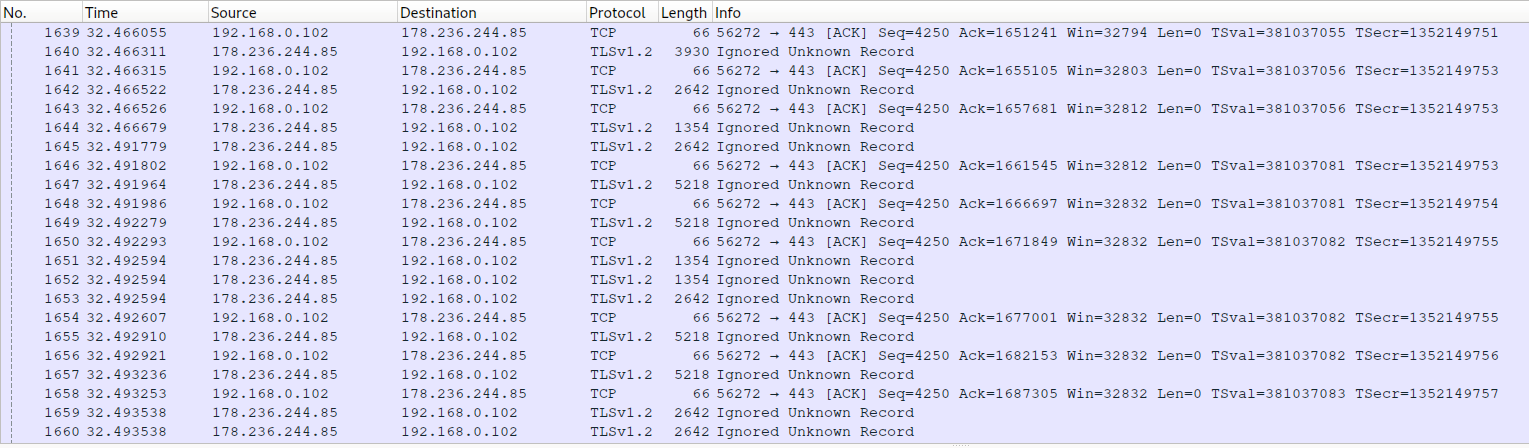

1. Найдём все активные устройства в своей локальной сети;
2. Выберем одно из обнаруженных устройств и проверим, какие порты открыты;
3. На том же устройстве определим операционную систему и версии сервисов;
4. Проверим устройство на наличие известных уязвимостей;
5. Сохраним результаты последнего сканирования в текстовый файл.

In [ ]:
> $ sudo nmap -A 192.168.0.171                                                                                            [±master ●●●]
Stats: 0:02:46 elapsed; 0 hosts completed (1 up), 1 undergoing Script Scan
NSE Timing: About 99.82% done; ETC: 19:26 (0:00:00 remaining)
Nmap scan report for 192.168.0.171
Host is up (0.040s latency).
Not shown: 996 filtered tcp ports (no-response)
PORT     STATE SERVICE       VERSION
135/tcp  open  msrpc         Microsoft Windows RPC
139/tcp  open  netbios-ssn   Microsoft Windows netbios-ssn
445/tcp  open  microsoft-ds?
6881/tcp open  landesk-rc    LANDesk remote management
MAC Address: 00:15:86:08:D0:5A (Xiamen Overseas Chinese Electronic)
Warning: OSScan results may be unreliable because we could not find at least 1 open and 1 closed port
Device type: general purpose|phone
Running (JUST GUESSING): Microsoft Windows 11|10|2022|Phone|2008 (97%)
OS CPE: cpe:/o:microsoft:windows_11 cpe:/o:microsoft:windows_10 cpe:/o:microsoft:windows_server_2022 cpe:/o:microsoft:windows cpe:/o:microsoft:windows_server_2008::sp1
Aggressive OS guesses: Microsoft Windows 11 21H2 (97%), Microsoft Windows 10 (92%), Microsoft Windows Server 2022 (91%), Microsoft Windows 10 1607 (91%), Microsoft Windows Phone 7.5 or 8.0 (88%), Microsoft Windows Server 2008 SP1 (88%)
No exact OS matches for host (test conditions non-ideal).
Network Distance: 1 hop
Service Info: OS: Windows; CPE: cpe:/o:microsoft:windows

Host script results:
| smb2-security-mode: 
|   3:1:1: 
|_    Message signing enabled but not required
|_nbstat: NetBIOS name: DT-5, NetBIOS user: <unknown>, NetBIOS MAC: 00:15:86:08:d0:5a (Xiamen Overseas Chinese Electronic)
| smb2-time: 
|   date: 2024-11-03T16:25:46
|_  start_date: N/A

TRACEROUTE
HOP RTT      ADDRESS
1   39.89 ms 192.168.0.171

OS and Service detection performed. Please report any incorrect results at https://nmap.org/submit/ .
Nmap done: 1 IP address (1 host up) scanned in 179.31 seconds


> $ sudo nmap --script vuln 192.168.0.171


Starting Nmap 7.95 ( https://nmap.org ) at 2024-11-03 19:29 MSK
Stats: 0:01:06 elapsed; 0 hosts completed (1 up), 1 undergoing SYN Stealth Scan
SYN Stealth Scan Timing: About 67.00% done; ETC: 19:31 (0:00:22 remaining)
Nmap scan report for 192.168.0.171
Host is up (0.063s latency).
All 1000 scanned ports on 192.168.0.171 are in ignored states.
Not shown: 1000 filtered tcp ports (no-response)
MAC Address: 00:15:86:08:D0:5A (Xiamen Overseas Chinese Electronic)

Nmap done: 1 IP address (1 host up) scanned in 88.79 seconds

> $ sudo nmap -A --script vuln 192.168.0.171 -oN scan_results.txt    # Сохранение результатов в файл scan_results.txt